# _Проектная работа №1_
# _по дисциплине "Основы математического моделирования"_
##  _Студента 335 группы_
## _Чернова Кирилла_
## _Задача №3_

### 1. Постановка задачи
Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнения переноса:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} +2t\frac{\partial u}{\partial x}= 3tu^{2}, 0<x \leq \frac{\pi}{2}, 0<t<\frac{1}{2},\\
& u(x,0)=2sin2x\\
& u(0,t)=-\frac{2sin2t^{2}}{1+3t^{2}sin2t^{2}}
\end{aligned} \right. \label{eq1}
\end{equation} $$

### 2. Исследование характеристик и поcтоение точного решения
Наша задача - квазилинейное уравнения переноса.
В точке $(x,t)=(0,0)$ значение функции $u=0$, то есть граничные и начальные условия согласованы.
Также функция $\varphi(x)$ является монотонно неубывающей, а функция $\eta(t)$ - монотонно невозрастающей. Поэтому решение нашей задачи должно быть неразрывным.
Найдем характиристики задачи и проверим, пересекаются ли они:
$$dt=\frac{dx}{2t}=\frac{du}{3tu^{2}} \Rightarrow x-t^{2}=C  \Rightarrow x-x_0=t^{2}-t_0^{2}$$ 
где $t_0$ и $x_0$ определяются из начальных условий.

Изобразим проекции характеристик в заданных областях.

Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import*  

Зададим границы инервалов на графике проекций характеристик:

In [ ]:
x_start = 0
x_end = pi/2
t_start = 0
t_end = 1
num = 15 

Определим функцию, которая позволит построить два семейства характеристик, задаваемых граничными и начальными условиями. Массивы значений $x_0$ и $t_0$ будем брать равномерно распределенными на заданном интервале:

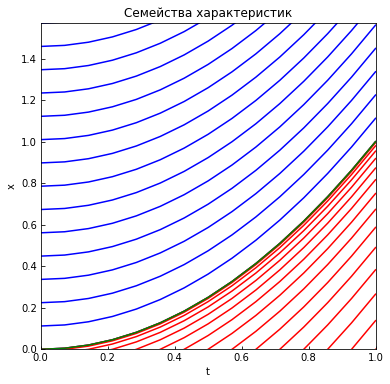

In [ ]:
def plot_characteristics(x_start, x_end, t_start, t_end, num):
        fig, ax =plt.subplots(figsize=(6,6))
        plt.ylim(x_start,x_end)
        plt.xlim(t_start, t_end)
        plt.title('Семейства характеристик')
        plt.xlabel('t')
        plt.ylabel('x')
        x_array = np.linspace(x_start, x_end, num)
        t_array = np.linspace(t_start, t_end, num)
        for x0 in x_array:
            plt.plot(t_array, t_array**2+x0, color = "b")  #  Начальные условия
        
        for t0 in t_array:
            plt.plot(t_array,t_array**2-t0**2, color = "r")  #  Граничные условия
        
        plt.plot(t_array,t_array**2, color = "g") 
        ax.tick_params(axis = 'both', which = 'major', direction ='in')
plot_characteristics(x_start, x_end, t_start, t_end, num)

при $t_0=0$: $x=t^{2}+x_0$ - являются параболами, сдвинутыми вверх по оси x, изображены на рисунке <span style="color:blue"> синим </span>.

при $x_0=0$: $x=t^{2}-t_0$ - изображены <span style="color:red"> красным </span>.

при  $x_0=t_0=0$: $x=t^{2}$ - кривая, разделяющая два семейства решений, изображена <span style="color:green"> зеленым </span>.

**_Таким образом, в заданной области характеристики не пересекаются, а значит, решение единственно._**



Из уравнений характеристик: $$dt=\frac{dx}{2t}=\frac{du}{3tu^{2}}$$
Получим систему уравнений: 
$$\begin{equation}
 \left\{
\begin{aligned}
& x-t^{2}=C_1\\
& \frac{2}{3u}+x=C_2\\
\end{aligned} \right. \label{eq2}
\end{equation} $$

Будем искать решение в виде неявно заданной функции: $$V(C_1,C_2)=0 \Rightarrow V(x-t^{2},\frac{2}{3u}+x)=0$$
С учетом того, что мы знаем значение функции для граничных и начальных условий, получим:
$$\begin{equation}
 \left\{
\begin{aligned}
& V(x,x+\frac{1}{3sin2x})=0, t=0\\
& V(-t^{2},-t^{2}-\frac{1}{3sin2t^{2}})=0,x=0\\
\end{aligned} \right. \label{eq3}
\end{equation} $$

Отсюда, с учетом $V(x-t^{2},\frac{2}{3u}+x)=0$, получаем следующее:
$$\frac{2}{3u}+x=x-t^{2}+\frac{1}{3sin2(x-t^{2})}$$

Таким образом, аналитическое решение имеет вид:
$$u(x,t)=\frac{2sin2(x-t^{2})}{1-3t^{2}sin(x-t^{2})}$$


Библиотеки для построения графиков:


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Зададим область изменения t и x, возьмем количество точек, как бы мы брали для сетки - N, J, и посчитаем значения функции в "узлах" аналитически и построи график аналитического решения.

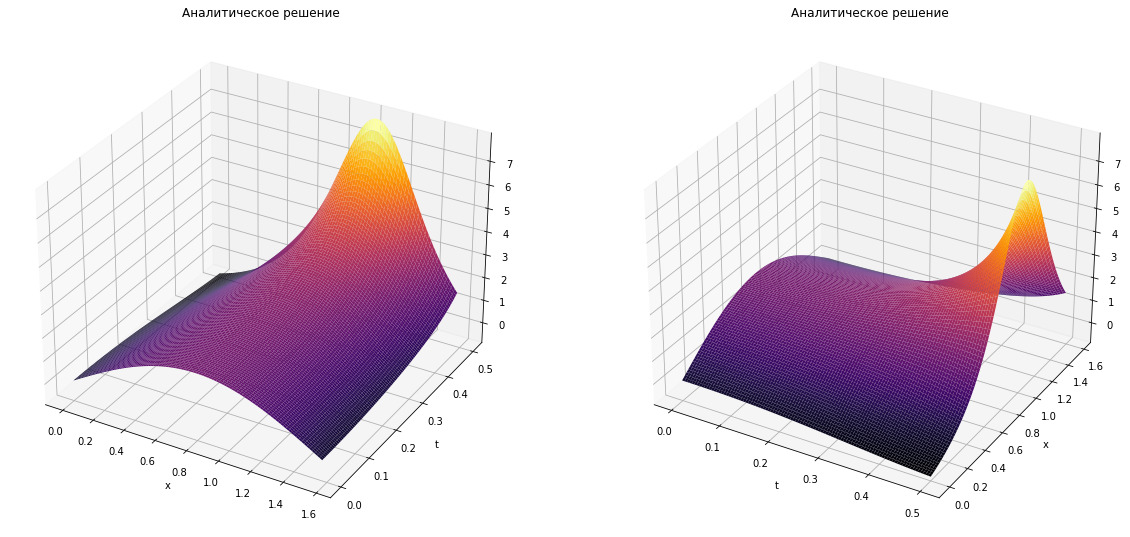

In [ ]:
N = 100
M = 100
x_start = 0
x_end = pi/2
t_start = 0
t_end = 0.5
t = np.linspace(t_start,t_end,M)
x = np.linspace(x_start,x_end,N)
u1 = np.zeros((N, M), dtype=float)
for n in range(0, N):
    for m in range(0, M):
        u1[n][m] = 2*sin(2*(x[n]-t[m]**2))/(1-3*t[m]**2*sin(2*(x[n]-t[m]**2)))
t1, x1 = np.meshgrid(t, x)
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
surf=ax.plot_surface(x1, t1, u1, rstride=1, cstride=1, cmap = cm.inferno)
plt.ylabel('t')
plt.xlabel('x')
plt.title('Аналитическое решение')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf=ax.plot_surface(t1, x1, u1, rstride=1, cstride=1, cmap = cm.inferno)
plt.ylabel('x')
plt.xlabel('t')
plt.title('Аналитическое решение')
plt.show()

### 3. Разностная схема

#### **_Метод решения_**
Для решения нашей задачи будем пользоваться **методом конечных разностей**. 

Поскольку в нашей задаче коэффициент при производной $u_x$ не зависит от $u$: $c(x,t)=2t$, а правая часть представляет собой неоднородность вида $f(x,t,u)=3tu^{2}$, не зависящую от дифференциальных операторов, то в нашем случае получается:
$$\frac{\partial u}{\partial t}+c(x,t) \frac{\partial u}{\partial x}=f(x,t,u)$$

Таким образом, если отбросить неоднородность, получим **однородную начально-краевую задачу для линейного уравнения переноса**:
$$\frac{\partial u}{\partial t}+c(x,t) \frac{\partial u}{\partial x}=0$$

Устойчивость данной задачи позволит нам сделать вывод об устойчивости исходной задачи, поэтому будем выбирать шаблон для линейной задачи и исследовать его на устойчивость, тем самым обеспечивая устойчивость первоначальной задачи.

#### **_Построение разностной схемы_**
Введем в расчетной области равномерную сетку:
$$\overline{\omega_{h,\tau}}=\big\{x_n=nh, t_m=jm, n=\overline{0,N}, m=\overline{0,M}\big\}$$
где $h,\tau$- шаги по координате и времени соответственно, $N,M$ - число узлов по осям $x,t$ соответственно.

Введем на $\overline{\omega_{h,\tau}}$ сеточную функцию: $U_n^j=u(x_n,t_m)$.

Для построения разностной схемы будем пользоваться **трехточечным шаблоном "верхний уголок"**

<img src=https://bit.ly/3bp8FoA width="300">

Таким образом, **разностная задача**, имеет следующий вид:

$$\begin{equation}
 \left\{
\begin{aligned}
&\frac{U_n^{m+1}-U_n^{m}}{\tau}+2t_{m+1}\frac{U_n^{m+1}-U_{n-1}^{m+1}}{h}=3t_{m+1}(U_n^{m+1})^2, n=\overline{1,N}, m=\overline{0,M-1}\\
& U_n^0=2sin2x_n,  n=\overline{0,N}\\
& U_0^m=-\frac{2sin2 t_m^{2}}{1+3 t_m^{2}sin2t_m^{2}}, m=\overline{0,М}
\end{aligned} \right. \label{eq4}
\end{equation} $$

#### **_Аппроксимация_** 
Определим диффернциальный оператор $L$ следующим образом: $$Lu = u_t + 2tu_x,$$ а конечно-разностный оператор $L_h$ следующим:  $$L_hu|_{(x_n, t_{m+1})}= \frac{1}{\tau}\Big(u(x_n, t_{m+1}) - u(x_n, t_{m})\Big) + \frac{2t_{m+1}}{h}\Big(u(x_n, t_{m+1}) - u(x_{n-1}, t_{m+1})\Big)$$ 

Рассмотрим функцию $\psi(x_n, t_{m+1}) = Lu(x_n, t_{m+1}) - L_hu|_{(x_n, t_{m+1})} = u_t(x_n, t_{m+1}) + 2t_{m+1}u_x(x_n, t_{m+1}) - \frac{1}{\tau}\Big(u(x_n, t_{m+1}) - u(x_n, t_{m})\Big) + \frac{2t_{m+1}}{h}\Big(u(x_n, t_{m+1}) - u(x_{n-1}, t_{m+1})\Big)$, где $$u(x_n, t_{m}) = u(x_n, t_{m+1} - \tau) = u(x_n, t_{m+1}) - \tau u_t(x_n, t_{m+1}) + \frac{\tau^2}{2}u_{tt}(x_n, t_{m+1})\: - \:... ,$$ $$u(x_{n-1}, t_{m+1}) = u(x_{n}, t_{m+1}) - hu_x(x_{n}, t_{m+1}) + \frac{h^2}{2}u_{xx}(x_{n}, t_{m+1})\: - \:...$$

В итоге:
$ \psi(x_n, t_{m+1}) = \mathcal{O}(h+\tau)$, то есть $L_h$ аппроксимирует $L$, причем порядок аппроксимации равен 1.


####  **_Устойчивость_** 
Поскольку в данной задаче скорость переноса $c(x,t)=2t$ зависит от времени, будем пользоваться **спектральным критерием Неймана с "замороженными" коэффициентами**.

Рассмотрим произвольную точку $(x^*,t^*)\in\overline{ \omega_{h,\tau}}$ и положим $c(x^*,t^*)=C$

Тогда, проанализируем однородное линейное уравнение переноса:
$$\frac{\partial u}{\partial t}+C\frac{\partial u}{\partial t}=0 \Rightarrow \frac{U_n^{m+1}-U_n^{m}}{\tau}+C\frac{U_n^{m+1}-U_{n-1}^{m+1}}{h}=0$$

где начальные условия имееют специальный вид: $U_n^0=e^{iqx_n}=e^{i\alpha n}$, $\alpha=qh$, $q$ - произвольное вещественное число. 

Тогда, подставляя в полученное уравнение значение $U_n^0$, получим, что  $U_n^0=\lambda e^{i\alpha n} $, и так далее, на произвольном $m$  слое получим: $U_n^m=\lambda^{m}e^{i\alpha n}$. 

Числа $\lambda$ называются множителями роста.

Подставим $U_n^m=\lambda^{m}e^{i\alpha n}$ в уравнение:
$$\frac{\lambda ^{m+1}e^{i\alpha n} -\lambda ^{m}e^{i\alpha n}}{\tau}-C\frac{\lambda ^{m+1}e^{i\alpha n} -\lambda ^{m+1}e^{i\alpha n}e^{-i\alpha}}{h}=0  $$
$$\frac{1-\frac{1}{\lambda}}{\tau}+C\frac{1-e^{-i \alpha}}{h}=0$$
Тогда: $$\lambda=\frac{1}{1+\frac{C\tau}{h}(1-e^{-i\alpha})}$$
<img src=https://bit.ly/2YUUyEy width="400">

Рассмотрим $|\lambda ^{-1}|= 1+\frac{C\tau}{h}(1-e^{-i\alpha})$  и положим $r=\frac{C\tau}{h}$. Тогда спектр значений $\lambda^{-1}$ при любых вещественных $\alpha$ представляет окружность с центром в точке $1+r$ и радиусом $r$. Поскольку в нашем случае $С>0$, то и $r>0$. Значит, окружность, заполняемая значениями $\lambda^{-1}$ расположена вне единичного круга с центром в начале координат и касается окружности единичного радиуса. 

Это значит, что $|\lambda ^{-1}|\geq1 \Rightarrow |\lambda|\leq1$, и выбранная схема является **безусловно устойчивой** при любых соотношениях между $h$ и $\tau$.

### 4. Алгоритм вычисления
Полученную  разностную задачу будем решать с помощью **схемы бегущего счета**  .
В полученной задаче из начальных и граничных условий определены $U_n^0, U_o^m, \forall n,m$. Таким образом, неизвестным является $U_n^{m+1}$. 

Запишем уравнение в неявном виде: $$f(U_n^{m+1})=0$$

где $f(U_n^{m+1})=(\frac{2t_{m+1}}{h}+\frac{1}{\tau})U_n^{m+1}-3t_{m+1}(U_n^{m+1})^2-\frac{1}{\tau}(U_n^{m})-\frac{2t_{m+1}}{h}U_{n-1}^{m}$

Будем решать задачу **итерационным методом Ньютона**. Нужно найти корень уравнения $f(v)=0$, где  $v$ - некоторая гладкая функция.

Рассмотрим начальное приближение $v_0$ к корню, и положим $v_{n+1}=v_n+\delta v$.  Тогда с ростом $n$ значения должны прближаться к исходному корню, а погрешность $\delta v$ уменьшаться.

Раскладывая в ряд Тейлора уравнение и применяя линеаризацию, получаем:
$$f(v_{n+1})=f(v_n+\delta v)=f(v_n)+f'(v_n)\delta v=0 \Rightarrow \delta v=-\frac{f(v_n)}{f'(v_n)}$$

В качестве начального приближения можно взять значение сеточной функции $U$ со слоя $m$: $v_0=U_n^{m}$.

$f'$ - производная, в нашем случае: $$f'(v_n)=-6n\tau v_n+\frac{2n\tau}{h}+\frac{1}{\tau}$$

Когда мы подойдем к искомому корню с нужной нам точностью, итерационный процесс прекратится, и мы возьмем
$U_n^{m+1}$ равным последнему найденному $v_{n+1}$. То есть условие остановки итерационного процесса записывается следующим образом:
$$|v_{n+1}-v_n|\leq \varepsilon $$

### 5. Рассчеты

Запишем функции для определения значений $f$ и  $f'$ в узлах сетки:

In [ ]:
def f(n, m_up): 
    m = m_up - 1
    n_down = n - 1
    return (u[n][m_up]-u[n][m])/tau+2*m_up*tau*(u[n][m_up]-u[n_down][m])/h-3*m_up*tau*u[n][m_up]**2

In [ ]:
def df(np1, mp1):
    m = mp1-1
    return (1/tau+2*m*tau/h-3*2*m*tau*u[np1][mp1])

Найдем значения $U_n^m$

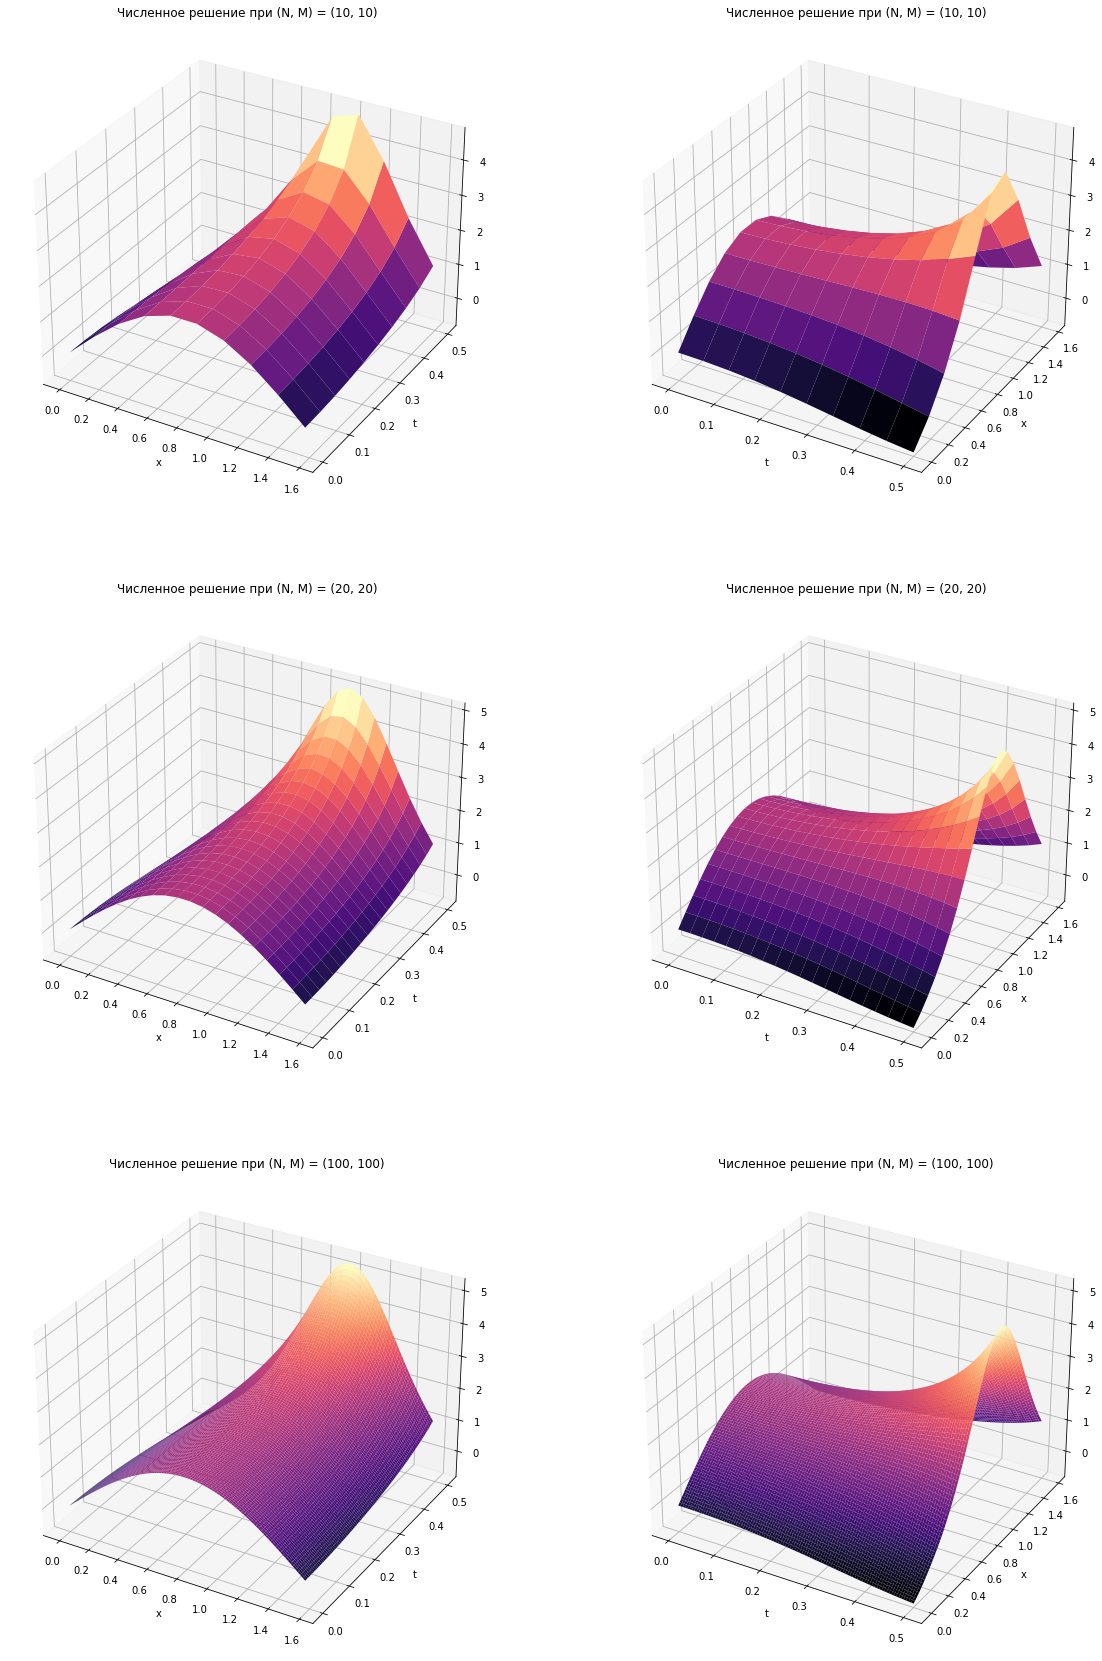

In [ ]:
epsilon = 1e-10 # точность
x_start = 0
x_end = pi/2
t_start = 0
t_end = 0.5

steps = [(10, 10), (20, 20), (100, 100)]
num_sol = []
N, M = 10, 10
num = 1
fig= plt.figure(figsize=(20,30))
for k, step in enumerate(steps):
    N, M = step
    tau = t_end/(M) # шаги 
    h = x_end/(N)
    t = np.linspace(t_start, t_end, M)
    x = np.linspace(x_start, x_end, N)
    u = np.zeros((N, M), dtype=float) 
    for n in range(0,N):
        u[n][0] = 2*sin(2*x[n]) # начальные условия 
    for m in range(0,M):
        u[0][m] = -2*sin(2*t[m]**2)/(1+3*t[m]**2*sin(2*t[m]**2)) # граничные условия
    for m in np.arange(M-1):
        for n in np.arange(N-1):
            eps = epsilon + 1;
            while eps > epsilon:
                delta = f(m+1, n+1)/der_f1(m+1, n+1)
                u[m+1][n+1] = u[m+1][n+1] - delta
                eps = np.abs(delta)
    tm = np.linspace(t_start,t_end,M)
    xn= np.linspace(x_start,x_end,N)
    t, x = np.meshgrid(tm, xn)
    num_sol.append((t, x, u))
    ax = fig.add_subplot(len(steps), 2, num, projection='3d')
    surf=ax.plot_surface(x, t, u, rstride=1, cstride=1, cmap = cm.magma)
    plt.ylabel('t')
    plt.xlabel('x')
    plt.title('Численное решение при (N, M) = ' + str(step))
    num += 1
    ax = fig.add_subplot(len(steps), 2, num, projection='3d')
    surf=ax.plot_surface(t, x, u, rstride=1, cstride=1, cmap = cm.magma) 
    plt.ylabel('x')
    plt.xlabel('t')
    plt.title('Численное решение при (N, M) = ' + str(step))
    num += 1
plt.show()

####  **_Оценка расходимости_**
Поскольку у нас есть возможность сравнить численное и аналитическое решение, построим разность решений:

$u(x_n,t_m)-U_{n}^{m}$

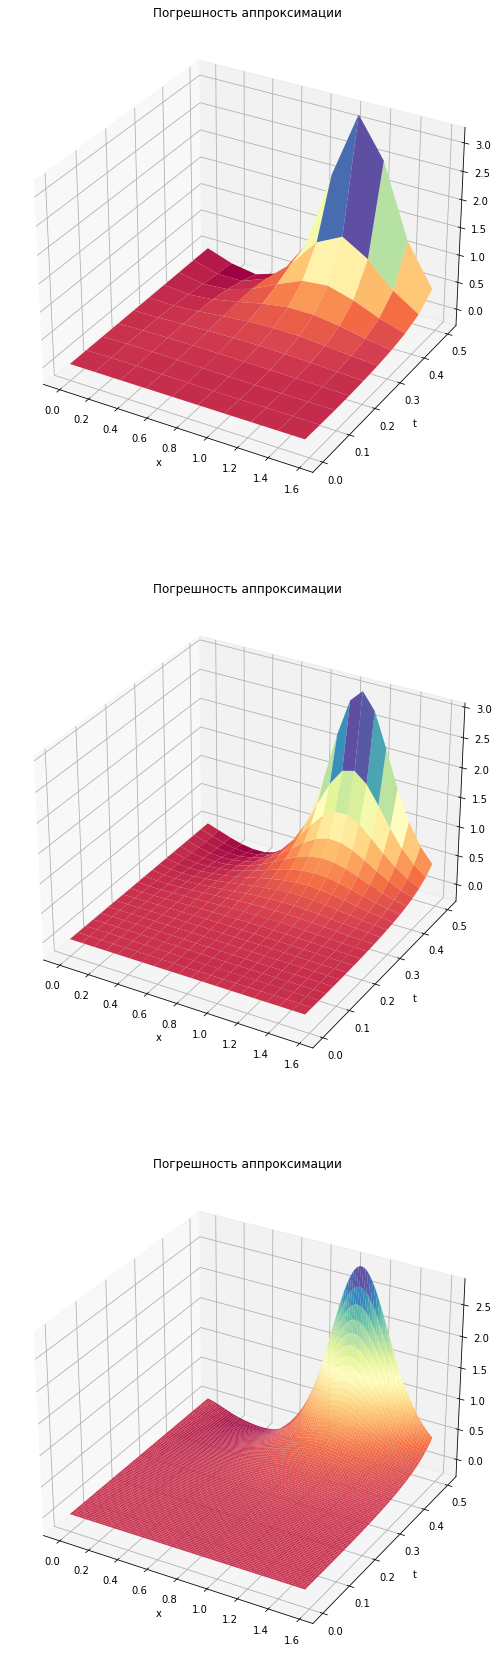

In [ ]:
fig = plt.figure(figsize=(20,30))
for k, step in enumerate(steps):
    M, N = step
    t1 = np.linspace(t_start,t_end, M)
    x1 = np.linspace(x_start,x_end,N)
    u1 = np.zeros((N, M), dtype=float)
    for n in range(0, N):
        for m in range(0, M):
            u1[n][m] = 2*sin(2*(x1[n]-t1[m]**2))/(1-3*t1[m]**2*sin(2*(x1[n]-t1[m]**2)))
    t1, x1 = np.meshgrid(t1, x1)
    
    v = np.zeros((N, M), dtype=float)
    for n in range(0, N):
        for m in range(0, M):
            v[n][m] = u1[n][m]-num_sol[k][2][n][m]
    tn = np.linspace(t_start,t_end,M)
    xm = np.linspace(x_start,x_end,N)
    T, X = np.meshgrid(tn, xm)
    ax = fig.add_subplot(len(steps), 1, k+1, projection='3d')
    ax.plot_surface(X, T, v,rstride=1, cstride=1, cmap = cm.Spectral)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Погрешность аппроксимации')
plt.show()

Видно,что наибольшая погрешность достигается при больших значениях $x$ и $t$, где скорость возрастания решения увеличивается.